# Chapter 5 Coastal Engineering: Longshore sediment transport

1. [Introduction: Longshore Sediment](#1.-Introduction)
2. [Simulation: Longshore Sediment](#2.-Simulation)
3. [Simulation: Comparitive studies](#3.-Simulation)
4. [Self-Assessment](#4.-Self-Assessment)

## 1. Introduction


### What Is Longshore Sediment Transport?

Longshore sediment transport refers to the movement of sand and sediment along the shoreline, driven primarily by wave action approaching the coast at an angle. As waves break, they generate currents that move sediment parallel to the shore in a process known as **longshore drift**.

Longshore transport occurs when sufficient energy from breaking waves moves predominantly suspended sediment parallel to the shoreline. This process is driven by waves approaching the coast at an angle, which imparts a component of energy along the shore. If waves strike the shore perpendicularly, longshore transport does not occur. Key factors influencing this transport include particle size, longshore current strength, wave crest angle relative to the shoreline, the depth at which waves break, and the wave height at breaking.

This transport mechanism is critical in shaping coastal features such as beaches, barrier islands, spits, and dunes.

### 🌊 Longshore Sediment Transport Models in Coastal Engineering

| **Model**              | **Formula**                                                                 | **Key Variables**                                                                 | **Strengths**                                                  | **Limitations**                                                  |
|------------------------|------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|----------------------------------------------------------------|------------------------------------------------------------------|
| **CERC (1984)**        | $( Q = K \cdot P_l \cdot \sin(2\alpha) $)                                   | $( P_l $): wave energy flux, $( \alpha $): wave angle, $( K $): empirical coeff. | Widely used in design; simple and practical                    | Empirical; limited grain size and slope sensitivity              |
| **Komar & Inman (1970)** | $( Q \propto E \cdot C \cdot \sin(\theta) \cdot \cos(\theta) $)             | $( E $): wave energy, $( C $): celerity, $( \theta $): wave angle                 | Physically intuitive; links wave power to transport            | Requires calibration; sensitive to wave angle                    |
| **Dean (2001)**        | Uses CERC and Komar-Inman formulations; emphasizes sediment dependence      | Grain size, wave height, angle, breaker depth                                    | Integrates sediment properties; practical for nourishment      | Less accurate in complex morphologies                            |
| **Kamphuis (1991)**    | $( Q = K H_b^{2.5} \cdot D_{50}^{-0.25} \cdot \sin^{0.6}(\theta) \cdot L $) | $( H_b $): breaker height, $( D_{50} $): grain size, $( L $): wave length        | Includes sediment size and slope; semi-empirical               | More complex; requires detailed input                            |
| **Van Rijn (1984)**    | Process-based transport equations                                           | Flow velocity, sediment concentration, bed shear stress                          | Good for detailed modeling; includes suspended and bedload     | Computationally intensive; needs calibration                     |
{cite:p}`CERC1984, Kamphuis1991, VanRijn1984, KomarInman1970, Dean2001`, provides Longshore Sediment Transport Models in Coastal Engineering

---

### Why Is It Important?

- **Coastal Morphology**: It maintains and reshapes beaches and barrier islands.
- **Erosion Control**: Helps redistribute sediment to areas experiencing erosion.
- **Habitat Preservation**: Supports dynamic habitats like marshes and dunes.
- **Infrastructure Protection**: Influences shoreline stability near roads, ports, and levees.
- **Restoration Planning**: Guides sediment placement in beach nourishment and wetland creation.

---

### Significance in Coastal Louisiana

Coastal Louisiana is one of the most sediment-starved and rapidly eroding regions in the United States. Longshore sediment transport plays a vital role in:

### 🏝️ Barrier Island Stability
- Louisiana’s barrier islands (e.g., Chandeleur Islands, Timbalier Islands) rely on longshore drift to maintain their form.
- Studies show bidirectional transport patterns that redistribute sediment from central arcs to island flanks.

### 🏗️ Coastal Restoration
- Projects like the **Caminada Headland Restoration** use dredged sediment from areas like Ship Shoal to rebuild eroded shorelines.
- Understanding transport gradients helps prevent premature loss of placed sediment.

### 🌪️ Storm Resilience
- Hurricanes and tropical storms alter sediment transport directions, influencing erosion and deposition patterns.
- Accurate modeling of longshore transport helps predict post-storm shoreline changes.

### 🧪 Monitoring & Modeling
- Programs like the **Barrier Island Comprehensive Monitoring Program (BICM)** track sediment characteristics and transport trends across deltas and shorefaces.
- Tools like ROMS (Regional Ocean Modeling System) simulate sediment fluxes to inform restoration strategies.

---

### Challenges & Considerations

- **Reduced Sediment Supply**: Dams and levees limit natural sediment delivery from the Mississippi River.
- **Subsidence & Sea-Level Rise**: Accelerate land loss and complicate sediment retention.
- **Human Interventions**: Navigation channels and dredging can disrupt natural transport pathways.

---

### Reference

Longshore sediment transport is a cornerstone of coastal dynamics in Louisiana. Its understanding is essential for designing resilient restoration projects, preserving barrier islands
{cite}`komar1998beach` provides a comprehensive theoretical foundation for understanding sediment dynamics, including the role of wave energy and coastal morphology. {cite}`usace1984shore` provides practical guidance and empirical formulations, most notably the CERC formula, which estimates transport rates based on wave energy flux and angle of incidence. Together, these sources form the foundation for both academic studies and engineering practices in coastal sediment transport.  {cite}`dean2001coastal` presents sediment transport as a function of wave dynamics and sediment properties, integrating empirical models with engineering applications. 


## 2. Simulation

### Longshore Sediment Transport Analysis

This document explains the analytical steps used to estimate and visualize longshore sediment transport based on directional input data such as wind or wave parameters.

---

### 1. Input Data Description

The analysis begins with directional data measured in degrees from north (0° to 360°), along with wind/wave **speed** and **frequency**. These values are used to calculate sediment transport in coastal settings.

| Variable     | Description                                |
|--------------|--------------------------------------------|
| `direction`  | Wind or wave direction in degrees          |
| `speed`      | Wind or wave speed in m/s                  |
| `frequency`  | Occurrence or persistence (e.g., % time)   |

---

### 2. Wave Angle Conversion

To compute longshore transport, wave direction must be converted to an angle relative to the shoreline. If the shore is oriented east–west, then the angle relative to shore-normal is:



$$
\theta = \text{radians}(D - 90)
$$



Where:

- \( D \) = incoming wave direction in degrees
- \( \theta \) = wave angle relative to shore-normal

---

### 3. Wave Height Estimation

A simplified empirical relationship relates wind speed \( U \) to significant wave height \( H_s \):



$$
H_s = 0.016 \cdot U^2
$$



Where:

- \( H_s \) = estimated significant wave height in meters
- \( U \) = wind/wave speed in m/s

---

### 4. Sediment Transport Formula

The longshore sediment transport rate \( Q_s \) is computed using a modified energy-based approach:



$$
Q_s = K \cdot \rho \cdot \sqrt{g} \cdot H_s^{2.5} \cdot \sin(2\theta) \cdot \frac{F}{100}
$$



Where:

- \( K = 0.77 \) = empirical coefficient
- $( \rho = 1025 \, \text{kg/m}^3 $) = seawater density
- \( g = 9.81 \, \text{m/s}^2 \) = gravitational acceleration
- \( H_s \) = wave height
- $( \theta $) = wave angle relative to shore
- \( F \) = frequency (%)

The use of $( \sin(2\theta) $) reflects the effectiveness of oblique wave angles in generating longshore transport.

---

### 5. Sector Binning

Directional data is grouped into bins for analysis. A user-specified sector size (e.g., 30°, 45°) divides the 360° compass into labeled intervals:



$$
\text{bins} = \{0, 30, 60, 90, \dots, 360\}
$$



Each direction is assigned to a bin like `"30–60°"` to visualize transport intensity across sectors.

---

### 6. Net & Total Transport

**Total transport** is the sum of absolute

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# 🌬️ Windrose input data
data = {
    'direction': [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330],
    'speed':     [5.2, 6.8, 7.5, 5.9, 4.3, 3.8, 4.0, 5.5, 6.2, 7.0, 6.4, 5.6],
    'frequency': [4.5, 6.0, 8.2, 10.0, 7.3, 5.9, 4.1, 6.7, 9.4, 11.8, 10.3, 5.8]
}
df_orig = pd.DataFrame(data)

# 🧮 Constants
g = 9.81  # gravity
rho = 1025  # density of seawater
K = 0.77  # empirical coefficient

def sediment_transport(sector_size):
    if 360 % sector_size != 0:
        print("Sector size must divide evenly into 360°.")
        return

    df = df_orig.copy()
    df['theta'] = np.radians(df['direction'] - 90)
    df['Hs'] = 0.016 * df['speed'] ** 2
    df['Qs'] = K * rho * g ** 0.5 * df['Hs'] ** 2.5 * np.sin(2 * df['theta']) * df['frequency'] / 100

    # 🔀 Net transport vector
    df['x_component'] = df['Qs'] * np.cos(df['theta'])
    df['y_component'] = df['Qs'] * np.sin(df['theta'])
    net_x = df['x_component'].sum()
    net_y = df['y_component'].sum()
    net_transport = np.hypot(net_x, net_y)
    net_direction = (np.degrees(np.arctan2(net_y, net_x)) + 360) % 360
    total_transport = df['Qs'].abs().sum()

    # 📊 Sector binning
    bins = np.arange(0, 361, sector_size)
    labels = [f"{bins[i]}–{bins[i+1]}°" for i in range(len(bins) - 1)]
    df['sector'] = pd.cut(df['direction'], bins=bins, labels=labels, right=False, include_lowest=True)
    sector_summary = df.groupby('sector')['Qs'].sum().reset_index()

    # 📋 Text Summary
    print(f"📦 Total Transport Magnitude: {total_transport:.2f} kg/s")
    print(f"🧭 Net Transport Vector Magnitude: {net_transport:.2f} kg/s")
    print(f"→ Net Direction: {net_direction:.1f}°")

    # 📈 Polar plot
    plt.figure(figsize=(8, 5))
    plt.subplot(111, polar=True)
    plt.scatter(np.radians(df['direction']), df['Qs'], c='teal', s=60, alpha=0.8)
    plt.title('Directional Sediment Transport', va='bottom')
    plt.tight_layout()
    plt.show()

    # 📊 Bar plot by sector
    plt.figure(figsize=(8, 6))
    plt.bar(sector_summary['sector'], sector_summary['Qs'], color='dodgerblue')
    plt.title(f'Sediment Transport by Sector ({sector_size}° bins)')
    plt.ylabel('Qs (kg/s)')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 🧪 Interactive sector slider
interact(
    sediment_transport,
    sector_size=IntSlider(value=30, min=10, max=90, step=5, description="Sector Size (°)")
)


interactive(children=(IntSlider(value=30, description='Sector Size (°)', max=90, min=10, step=5), Output()), _…

<function __main__.sediment_transport(sector_size)>

## 3. Simulation

### 🌊 Comparative Study of Longshore Sediment Transport Formulas


Longshore sediment transport is driven by wave action and plays a key role in shaping coastal morphology. Several empirical and semi-theoretical formulas have been developed to estimate sediment transport rates, each with varying assumptions, parameters, and accuracy. This document compares commonly used formulas and analyzes their performance across different coastal conditions.

---

### Overview of Transport Formulas

| Formula                | Key Variables Used                                        | Strengths                                       | Limitations                                       |
|------------------------|-----------------------------------------------------------|-------------------------------------------------|---------------------------------------------------|
| **CERC (1984)**        | Wave height \( H_s \), angle \( \theta \), energy flux    | Simple and widely used                          | Overestimates in swell conditions                 |
| **Kamphuis (1991)**    | \( H_s, T, \tan \beta, D_{50} \)                          | Includes sediment size and slope                | Sensitive to input variations                     |
| **Van Rijn (1984/2014)** | Velocity, sediment size, bed shear stress              | Strong in surf-zone modeling                    | May underestimate under storm surge               |
| **Bayram et al. (2007)** | \( H_s, \theta, D_{50} \)                               | Refined version of CERC                         | Requires calibration                              |
| **Bijker (1971)**      | Current velocity, sediment interaction                   | Accounts for combined wave-current effects      | Known overestimation tendencies                   |
| **Sun Linyun (1992)**  | Empirical coefficients from field and lab data           | High accuracy in controlled tests               | Less internationally validated                    |

---

### Formula Equations (LaTeX Format)

- **CERC Equation**  
  $$ Q = K \cdot E_f \cdot \sin(2\theta) $$  
  where $( E_f = \frac{1}{8} \rho g H_s^2 C_g \) and \( K \approx 0.77 \)

- **Kamphuis Equation**  
  $$ Q = 2.27 H^{2.5} T^{0.5} \tan(\beta) D_{50}^{-0.25} \sin^{0.6}(2\theta) $$

- **Van Rijn Equation (simplified)**  
  $$ Q = A \cdot (U^2 - U_{cr}^2)^{1.5} D_{50}^{0.3} $$

---

### Performance Insights

Comparative studies show:

- **Van Rijn** provides high reliability in mixed wave scenarios.
- **Kamphuis** balances empirical and physical parameters well.
- **CERC** tends to overpredict and lacks sediment detail.
- **Sun Linyun** yields the **lowest prediction error** (36–73%) in lab tests.

> ✨ Example: In the DUCK85 field experiment, CERC estimated 80 kg/s while Van Rijn predicted 55 kg/s, closely matching the measured 52 kg/s.

---

### When to Use Which Formula

| Use Case                      | Recommended Formula     |
|------------------------------|--------------------------|
| Quick desktop assessment      | **CERC** or **Kamphuis** |
| High-resolution modeling      | **Van Rijn**             |
| Lab-scale validation          | **Sun Linyun**           |
| Mixed hydrodynamic scenarios  | **Bijker**               |
| Projects with calibration data| **Bayram et al.**        |

---

### Conclusion

Choosing the right longshore sediment transport formula requires balancing simplicity, accuracy, and context. While CERC and Kamphuis offer ease of use, Van Rijn and Sun Linyun deliver improved realism and precision. Field calibration remains essential for robust results in coastal management and design.

---

🌊 Total Longshore Sediment Transport Estimates:
  - CERC:      -168.95 kg/s
  - Kamphuis:  0.05 kg/s
  - Bayram:    -1694.80 kg/s


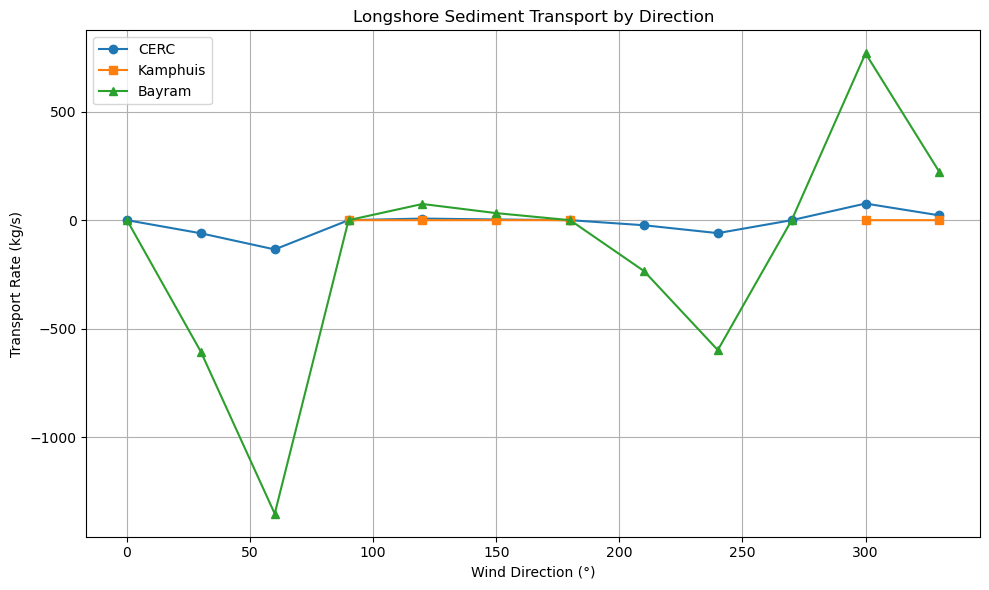

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🚀 Step 1: Create windrose data directly
data = {
    'direction': [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330],
    'speed':     [5.2, 6.8, 7.5, 5.9, 4.3, 3.8, 4.0, 5.5, 6.2, 7.0, 6.4, 5.6],
    'frequency': [4.5, 6.0, 8.2, 10.0, 7.3, 5.9, 4.1, 6.7, 9.4, 11.8, 10.3, 5.8]
}
df = pd.DataFrame(data)

# 🌊 Step 2: Define helper functions
def wave_angle(direction):
    return np.radians(direction - 90)  # Relative to shore orientation

def wave_height(wind_speed):
    return 0.016 * wind_speed ** 2  # Simplified empirical formula

def cerc_transport(Hs, theta, freq):
    return K_cerc * rho * g**0.5 * Hs**2.5 * np.sin(2 * theta) * freq / 100

def kamphuis_transport(Hs, T, slope, D50, theta, freq):
    return 2.27 * Hs**2.5 * T**0.5 * slope * D50**-0.25 * np.sin(2 * theta)**0.6 * freq / 100

def bayram_transport(Hs, theta, D50, freq):
    return 0.6 * rho * g**0.5 * Hs**2.5 * D50**-0.3 * np.sin(2 * theta) * freq / 100

# ⚙️ Step 3: Constants
K_cerc = 0.77
rho = 1025
g = 9.81
T = 8.0        # Wave period (s)
slope = 0.02   # Beach slope (tan beta)
D50 = 0.0002   # Median sediment diameter (m)

# 📊 Step 4: Apply formulas
df['theta'] = wave_angle(df['direction'])
df['Hs'] = wave_height(df['speed'])

df['CERC'] = cerc_transport(df['Hs'], df['theta'], df['frequency'])
df['Kamphuis'] = kamphuis_transport(df['Hs'], T, slope, D50, df['theta'], df['frequency'])
df['Bayram'] = bayram_transport(df['Hs'], df['theta'], D50, df['frequency'])

# 🧮 Step 5: Total transport comparison
total_cerc = df['CERC'].sum()
total_kamphuis = df['Kamphuis'].sum()
total_bayram = df['Bayram'].sum()

print(f"🌊 Total Longshore Sediment Transport Estimates:")
print(f"  - CERC:      {total_cerc:.2f} kg/s")
print(f"  - Kamphuis:  {total_kamphuis:.2f} kg/s")
print(f"  - Bayram:    {total_bayram:.2f} kg/s")

# 📈 Step 6: Visual comparison
plt.figure(figsize=(10, 6))
plt.plot(df['direction'], df['CERC'], label='CERC', marker='o')
plt.plot(df['direction'], df['Kamphuis'], label='Kamphuis', marker='s')
plt.plot(df['direction'], df['Bayram'], label='Bayram', marker='^')
plt.xlabel('Wind Direction (°)')
plt.ylabel('Transport Rate (kg/s)')
plt.title('Longshore Sediment Transport by Direction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Self-Assessment

### Quiz: Longshore Sediment Transport Concepts

Test your understanding of sediment transport mechanics and formula comparisons.

---

### ❓ Question 1  
**What is the formula used to calculate the wave angle relative to the shoreline?**

- [x] \\( \\theta = \\text{radians}(D - 90) \\)  
- [ ] \\( \\theta = \\text{radians}(D + 90) \\)  
- [ ] \\( \\theta = \\text{radians}(D - 180) \\)  
- [ ] \\( \\theta = \\text{radians}(D + 180) \\)  

> ✅ *Explanation:* This expression adjusts incoming wave direction \\( D \\) relative to a shore-oriented axis.

---

### ❓ Question 2  
**Which variable in the sediment transport formula represents the density of seawater?**

- [ ] \\( K \\)  
- [x] \\( \\rho \\)  
- [ ] \\( g \\)  
- [ ] \\( H_s \\)  

> ✅ *Explanation:* \\( \\rho \\) stands for seawater density, typically around \\( 1025 \\, \\text{kg/m}^3 \\).

---

### ❓ Question 3  
**What does the term \\( \\sin(2\\theta) \\) signify in the sediment transport equation?**

- [ ] Wave height  
- [ ] Wave frequency  
- [x] Effectiveness of oblique wave angles  
- [ ] Gravitational acceleration  

> ✅ *Explanation:* The \\( \\sin(2\\theta) \\) term captures how oblique waves enhance longshore transport.

---

### ❓ Question 4  
**What is the simplified formula to estimate significant wave height \\( H_s \\)?**

- [x] \\( H_s = 0.016 \\cdot U^2 \\)  
- [ ] \\( H_s = 0.016 \\cdot U \\)  
- [ ] \\( H_s = 0.016 \\cdot U^{1.5} \\)  
- [ ] \\( H_s = 0.016 \\cdot U^{0.5} \\)  

> ✅ *Explanation:* The formula relates wave height to wind/wave speed using a quadratic approximation.

---

### ❓ Question 5  
**Which sediment transport formula includes sediment size \\( D_{50} \\) and bed slope \\( \\tan \\beta \\)?**

- [ ] CERC (1984)  
- [x] Kamphuis (1991)  
- [ ] Van Rijn (1984/2014)  
- [ ] Bayram et al. (2007)  

> ✅ *Explanation:* Kamphuis integrates more physical parameters, including slope and grain diameter.

---

Would you like me to generate more questions or turn these into an interactive version using Python or `ipywidgets`?
